**Importing the required libraries**

In [1]:
# Importing libraries for handling matrices, dataframes, and visualizations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#miscellaneous libraries used
import re
import itertools
from collections import Counter
from sys import maxsize
import math
import warnings
warnings.filterwarnings("ignore")

#importing NLP and Data Visualisation related libraries
import string
from string import ascii_letters, punctuation, digits
import nltk
nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

**Loading the Data**

In [2]:
products = pd.read_csv("/content/drive/MyDrive/UpGrad_Hackathon/train_product_data.csv")
products.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [3]:
products_test = pd.read_csv("/content/drive/MyDrive/UpGrad_Hackathon/test_data.csv")
products_test.head()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl..."
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air (Mu...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Riana Copper Copper Bangle - Buy Riana Copper ...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection..."
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Inox Jewelry Stainless Steel Cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl..."


**Data Exploration and Preparation**

In [4]:
products.shape

(14999, 15)

In [5]:
products_test.shape

(2534, 14)

In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

In [7]:
products_test.shape

(2534, 14)

In [8]:
print(products.isna().sum())

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64


In [9]:
print(products_test.isna().sum())

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
pid                          0
retail_price                 4
discounted_price             4
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      522
product_specifications       5
dtype: int64


<Axes: >

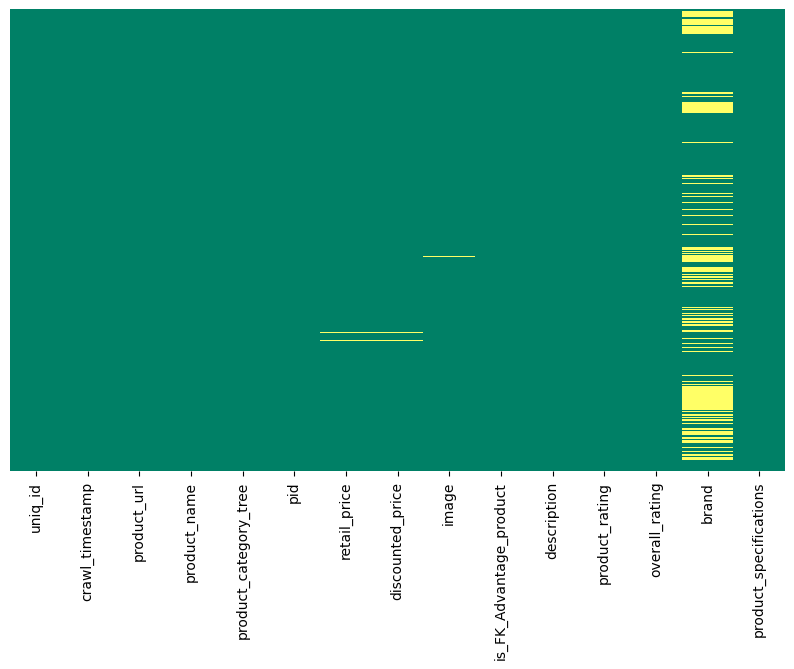

In [10]:
#heatmap showing the distribution of all Nan's of the data
plt.figure(figsize=(10,6))
sns.heatmap(products.isnull(), cbar=False, yticklabels=False, cmap = 'summer')

<Axes: >

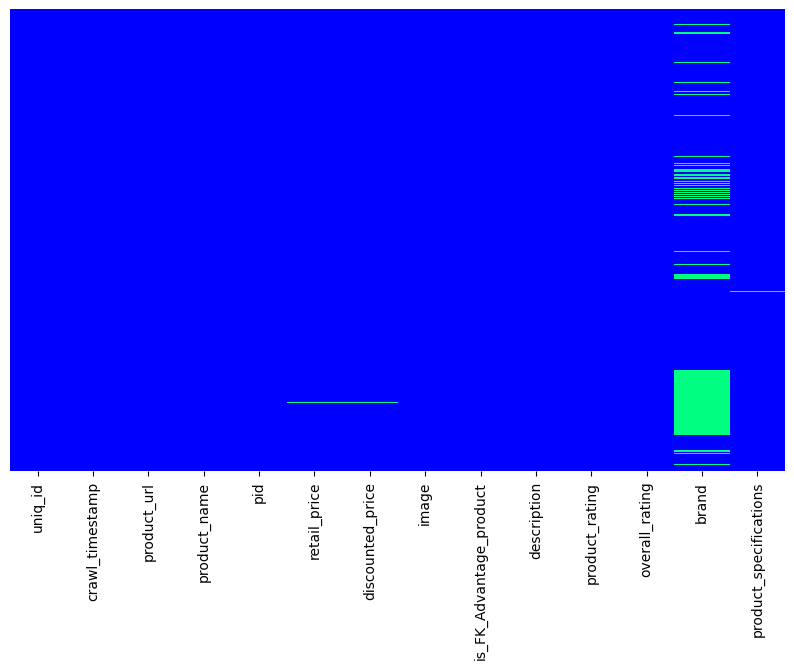

In [11]:
#heatmap showing the distribution of all Nan's of the test data
plt.figure(figsize=(10,6))
sns.heatmap(products_test.isnull(), cbar=False, yticklabels=False, cmap = 'winter')

In [12]:
print(products.duplicated().sum())

0


In [13]:
print(products_test.duplicated().sum())

0


In [14]:
#keeping only those datapoints whose description is not NaN
products = products[products['description'].notna()]

In [15]:
#keeping only those datapoints in test data whose description is not NaN
products_test = products_test[products_test['description'].notna()]

In [16]:
#keeping only those datapoints product_category_tree is not NaN
products = products[products['product_category_tree'].notna()]

In [17]:
#dropping the datapoints with duplicate descriptions
products = products.drop_duplicates("description",keep='first', inplace=False, ignore_index=True)
products = products.reset_index(drop=True)
products

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13158,16de377e88660863bc028949aedb8557,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air 2,Mobiles & Accessories,ACCEA4DZW4GZ3J6Q,2199.0,599.0,"[""http://img6a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air 2 (...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
13159,9402d23592adc0795e1ca71a661c9a5f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/babes-brass-cuff/p/itm...,Babes Brass Cuff,Jewellery,BBAEAEZ2EYWXWGZS,999.0,749.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Babes Brass Cuff (Pack of 2)\n ...,No rating available,No rating available,Babes,"{""product_specification""=>[{""key""=>""Collection..."
13160,87bcdd46bb48bfc1045d7ee84aef7b7a,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kenway-retail-brass-co...,Kenway Retail Brass Copper Cuff,Jewellery,BBAEA49HNDNQYGJU,529.0,295.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Kenway Retail Brass Copper Cuff\n ...,No rating available,No rating available,Kenway Retail,"{""product_specification""=>[{""key""=>""Collection..."
13161,1336909e5468b63c9b1281350eba647d,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kenway-retail-brass-co...,Kenway Retail Brass Copper Cuff,Jewellery,BBAEA49HHKJTPHWV,547.0,322.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Kenway Retail Brass Copper Cuff\n ...,No rating available,No rating available,Kenway Retail,"{""product_specification""=>[{""key""=>""Collection..."


In [18]:
#dropping the datapoints from test data with duplicate descriptions
products_test = products_test.drop_duplicates("description",keep='first', inplace=False, ignore_index=True)
products_test = products_test.reset_index(drop=True)
products_test

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl..."
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air (Mu...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Riana Copper Copper Bangle - Buy Riana Copper ...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection..."
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Inox Jewelry Stainless Steel Cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,3ab6fae88a53a66dd7c3cbf6fc9fbd3c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,STIEBU65TYHDZPGX,3559.0,1369.0,"[""http://img5a.flixcart.com/image/sticker/p/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
2098,d5a16fb788c38554feb734c15d66be6b,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-extra-large...,Wallmantra Extra Large Vinyl Stickers Sticker,STIE9F5UWNR43SZ4,3016.0,2194.0,"[""http://img6a.flixcart.com/image/sticker/5/q/...",False,Buy Wallmantra Extra Large Vinyl Stickers Stic...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
2099,43c9e22c8e9d67c0ef63f6b2d11671d7,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-extra-large...,Wallmantra Extra Large Vinyl Stickers Sticker,STIEBU65VMEQGTZY,7069.0,2719.0,"[""http://img5a.flixcart.com/image/sticker/t/z/...",False,Buy Wallmantra Extra Large Vinyl Stickers Stic...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
2100,b90031c6daba26d176aeda12eb3960d3,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-extra-large...,Wallmantra Extra Large Vinyl Stickers Sticker,STIEBU65HUNJ9GZB,5795.0,2229.0,"[""http://img6a.flixcart.com/image/sticker/g/z/...",False,Buy Wallmantra Extra Large Vinyl Stickers Stic...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."


In [19]:
#listing all the columns of dataset
print(products.columns.tolist())

['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product', 'description', 'product_rating', 'overall_rating', 'brand', 'product_specifications']


In [20]:
#listing all the columns of test dataset
print(products_test.columns.tolist())

['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product', 'description', 'product_rating', 'overall_rating', 'brand', 'product_specifications']


In [21]:
#dropping the unecessary columns
products = products.drop(['uniq_id',
               'crawl_timestamp',
               'product_url',
               'product_name',
               'pid',
               'retail_price',
               'discounted_price',
               'image',
               'product_rating',
               'overall_rating',
               'brand',
               'is_FK_Advantage_product',
               'product_specifications'], axis = 1)

In [22]:
#dropping the unecessary columns of test data
products_test = products_test.drop(['uniq_id',
               'crawl_timestamp',
               'product_url',
               'product_name',
               'pid',
               'retail_price',
               'discounted_price',
               'image',
               'product_rating',
               'overall_rating',
               'brand',
               'is_FK_Advantage_product',
               'product_specifications'], axis = 1)

In [23]:
products.head()

,product_category_tree,description
0,Clothing,Key Features of Alisha Solid Women's Cycling S...
1,Footwear,Key Features of AW Bellies Sandals Wedges Heel...
2,Clothing,Key Features of Alisha Solid Women's Cycling S...
3,Clothing,Key Features of Alisha Solid Women's Cycling S...
4,Footwear,"Key Features of dilli bazaaar Bellies, Corpora..."


In [24]:
products_test.head()

,description
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...
1,Kalpaveda Copper Copper Cuff\n ...
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...
3,Riana Copper Copper Bangle - Buy Riana Copper ...
4,Inox Jewelry Stainless Steel Cuff\n ...


**Descriptive Analysis**

A bar graph of the 30 and 20 most frequent words occuring in the train and test dataset is made. This has helped us in adding some words to our stopwords list like shipping, delivery, flipkart, etc (which are then removed) as they do not have much meaning/contribution in the prediction of product category.

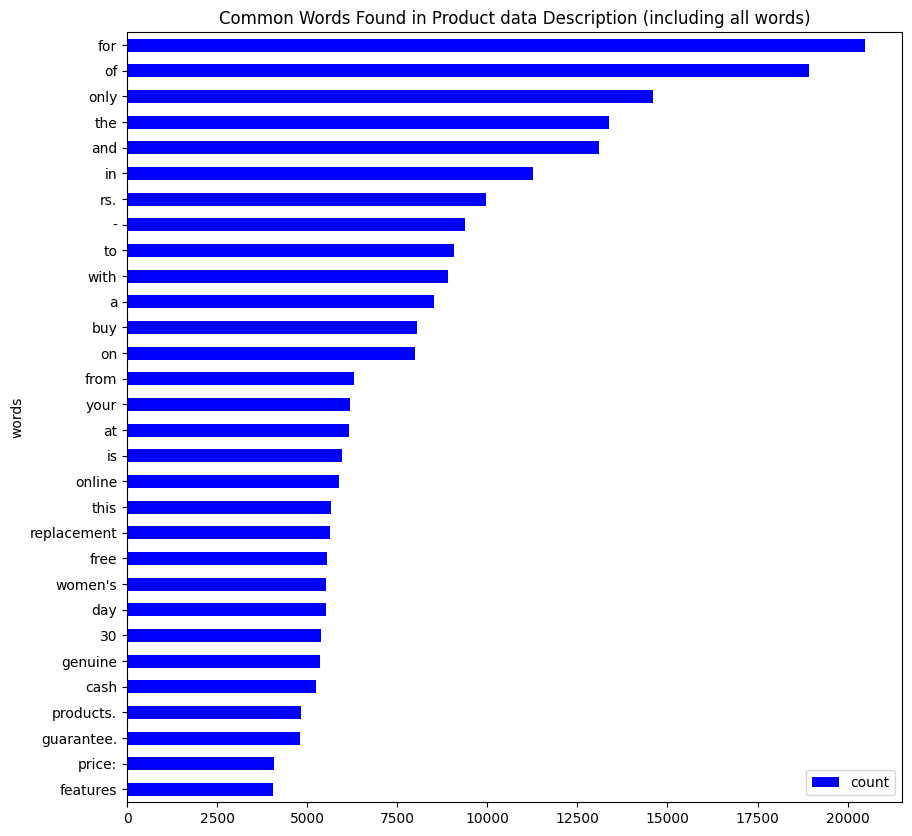

In [25]:
# for Train Data
def most_frequent_words(description):

  for i in range(len(description)):
    description[i] = description[i].lower().split()

  all_words = list(itertools.chain(*description))
  word_counts = Counter(all_words)

  clean_description = pd.DataFrame(word_counts.most_common(30),
                                    columns=['words', 'count'])

  return clean_description

description = products["description"].tolist()
most_common_description = most_frequent_words(description)

fig, ax = plt.subplots(figsize=(10, 10))

# plotting the bargraph in decreasing sorted order
most_common_description.sort_values(by='count').plot.barh(x='words',
                                                          y='count',
                                                          ax=ax,
                                                          color="blue")

ax.set_title("Common Words Found in Product data Description (including all words)")
plt.show()

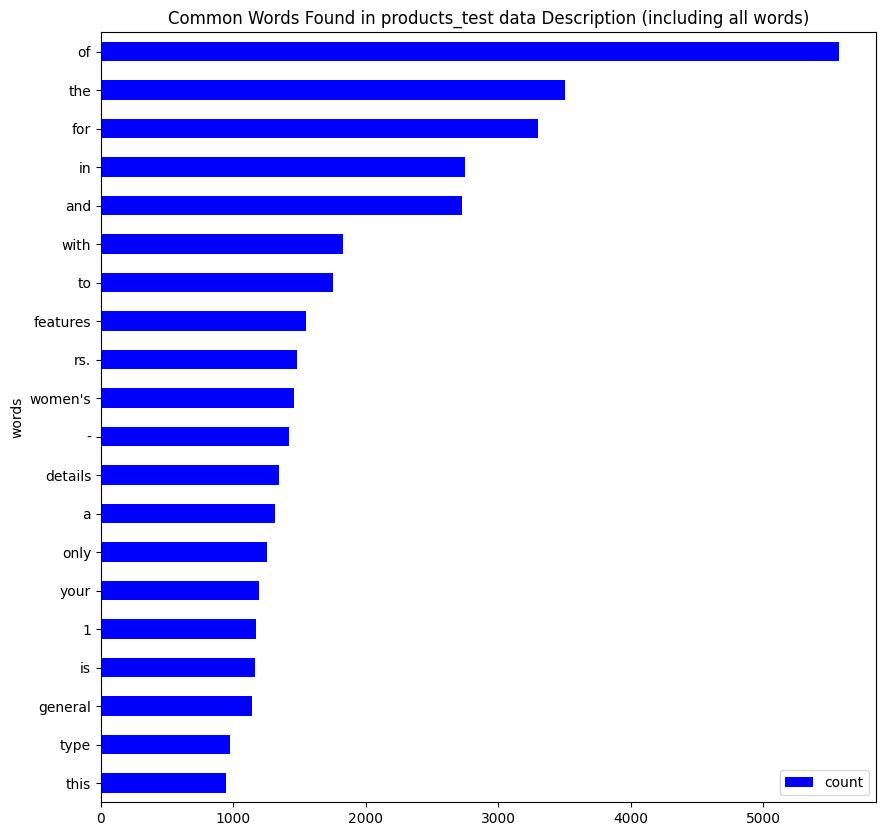

In [26]:
# for Test Data
def most_frequent_words(description):

  for i in range(len(description)):
    description[i] = description[i].lower().split()

  all_words = list(itertools.chain(*description))
  word_counts = Counter(all_words)

  clean_description = pd.DataFrame(word_counts.most_common(20),
                                    columns=['words', 'count'])

  return clean_description

description = products_test["description"].tolist()
most_common_description = most_frequent_words(description)

fig, ax = plt.subplots(figsize=(10, 10))

# plotting the bargraph in decreasing sorted order
most_common_description.sort_values(by='count').plot.barh(x='words',
                                                          y='count',
                                                          ax=ax,
                                                          color="blue")

ax.set_title("Common Words Found in products_test data Description (including all words)")
plt.show()

**Exploratory Data Analysis**

In [27]:
# Split the product_category_tree column by ">>" and extract the first level category
products['product_category'] = products['product_category_tree'].apply(lambda x: x.split('>>')[0].strip())

# Get the frequency count of each category
category_counts = products['product_category'].value_counts()

# Display the top categories
categories = category_counts
print(categories)

product_category
Clothing                      4663
Jewellery                     2658
Footwear                       988
Automotive                     935
Home Decor & Festive Needs     606
Kitchen & Dining               606
Computers                      529
Watches                        526
Mobiles & Accessories          501
Tools & Hardware               321
Toys & School Supplies         260
Pens & Stationery              223
Baby Care                      195
Bags, Wallets & Belts          152
Name: count, dtype: int64


In [28]:
# Data for the bar plot
categories = {
    "Clothing": 4663,
    "Jewellery": 2658,
    "Footwear": 988,
    "Automotive": 935,
    "Home Decor & Festive Needs": 606,
    "Kitchen & Dining": 606,
    "Computers": 529,
    "Watches": 526,
    "Mobiles & Accessories": 501,
    "Tools & Hardware": 321,
    "Toys & School Supplies": 260,
    "Pens & Stationery": 223,
    "Baby Care": 195,
    "Bags, Wallets & Belts": 152,
}

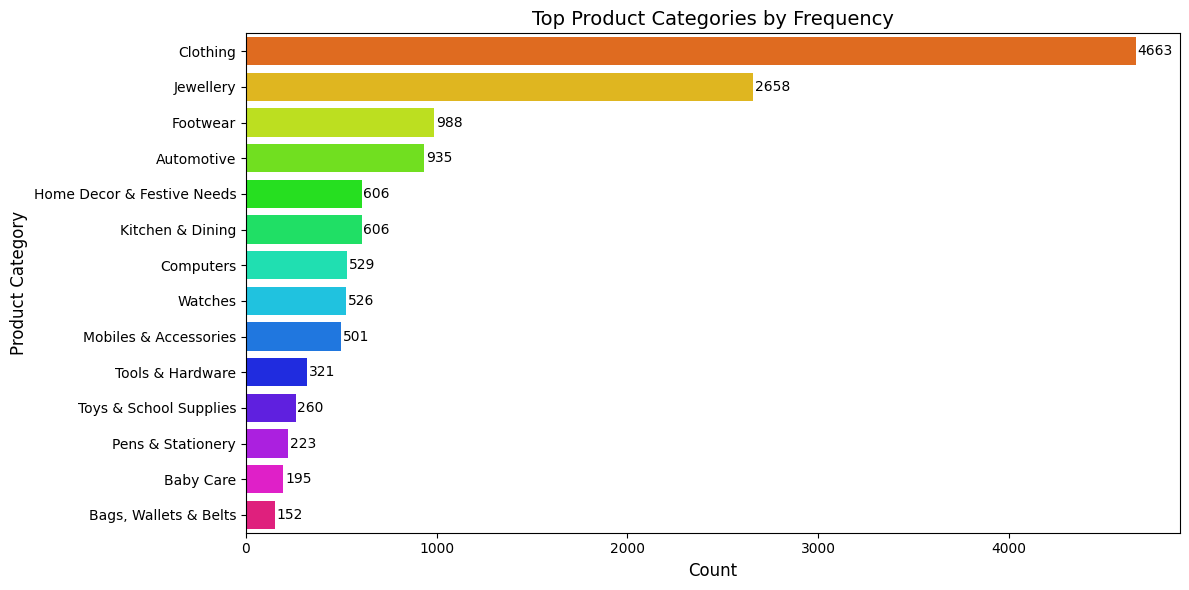

In [29]:
# Convert to sorted lists
category_names = list(categories.keys())
category_counts = list(categories.values())

# Create a colorful bar plot
plt.figure(figsize=(12, 6))
colors = sns.color_palette("hsv", len(categories))
sns.barplot(x=category_counts, y=category_names, palette=colors)

# Add text annotations for counts
for index, value in enumerate(category_counts):
    plt.text(value + 10, index, str(value), va='center', fontsize=10, color='black')

# Add labels and title
plt.xlabel("Count", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Top Product Categories by Frequency", fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()

**Text Length Analysis**

Analysis of the length of the Product Description is done to help us get an idea about the minimum, maximum and average length of the same. This is done in order to decide whether we have to discard some datapoints having text length less than or greater to a threshold.

In [30]:
#finding the length of the description
max_desc_len = -1
desc_len_sum = 0
min_desc_len = maxsize

product_description = products["description"].tolist()

for i in range(len(product_description)):
  try:
    max_desc_len = max(max_desc_len,len(product_description[i]))
    min_desc_len = min(min_desc_len,len(product_description[i]))
    desc_len_sum+=len(product_description[i])
  except:
    pass

print("Max description length is {}.".format(max_desc_len))
print("Min description length is {}.".format(min_desc_len))
print("Average description length is {}.".format(desc_len_sum/len(product_description)))

Max description length is 5309.
Min description length is 74.
Average description length is 410.81508774595454.


**Visualisation of the Minimum description length across all the categories**

From the graph below we can see that there are discrepancies in the minimum length across all the categories. **Watches** have a minimum length almost greater than 170 while **clothing** has the minimum length.

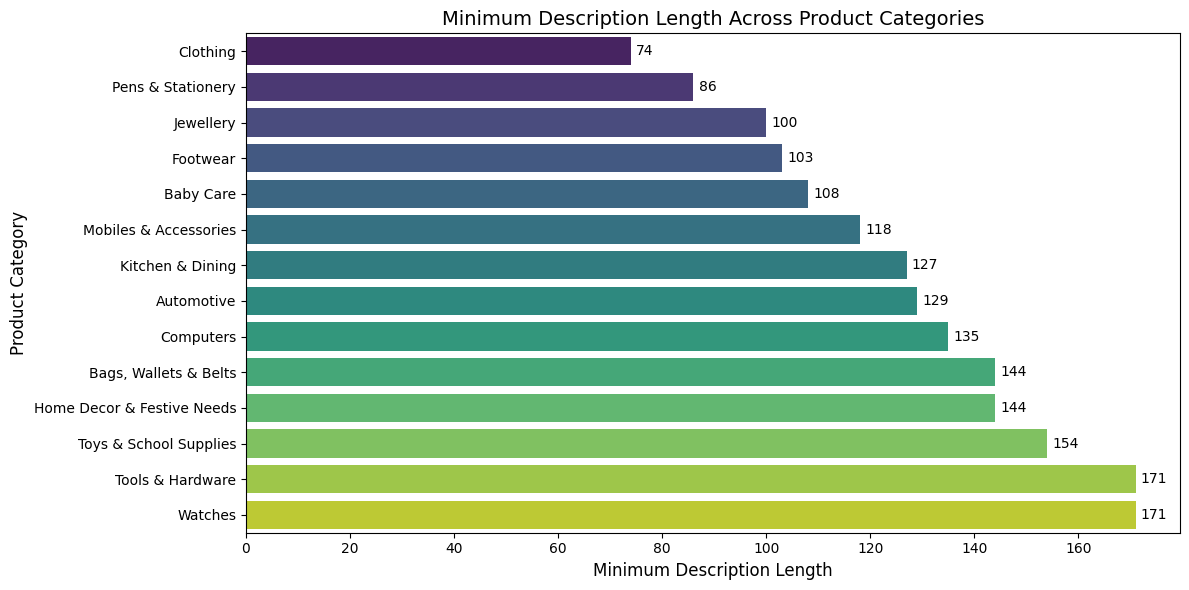

In [31]:
# Calculate the length of each description
products['description_length'] = products['description'].apply(len)

# Get the minimum description length for each category
min_desc_length_per_category = products.groupby('product_category')['description_length'].min().sort_values()

# Prepare data for visualization
categories = min_desc_length_per_category.index
min_lengths = min_desc_length_per_category.values

# Create a bar plot for minimum description lengths across categories
plt.figure(figsize=(12, 6))
sns.barplot(x=min_lengths, y=categories, palette="viridis")

# Add text annotations for minimum lengths
for index, value in enumerate(min_lengths):
    plt.text(value + 1, index, str(value), va='center', fontsize=10, color='black')

# Add labels and title
plt.xlabel("Minimum Description Length", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Minimum Description Length Across Product Categories", fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()


**Visualisation of the Maximum description length across all the categories**

From the graph below we can see that almost all the product description lengths are greater than 1500 with **jewellary** category having the greatest length for product description (greater than 5000)

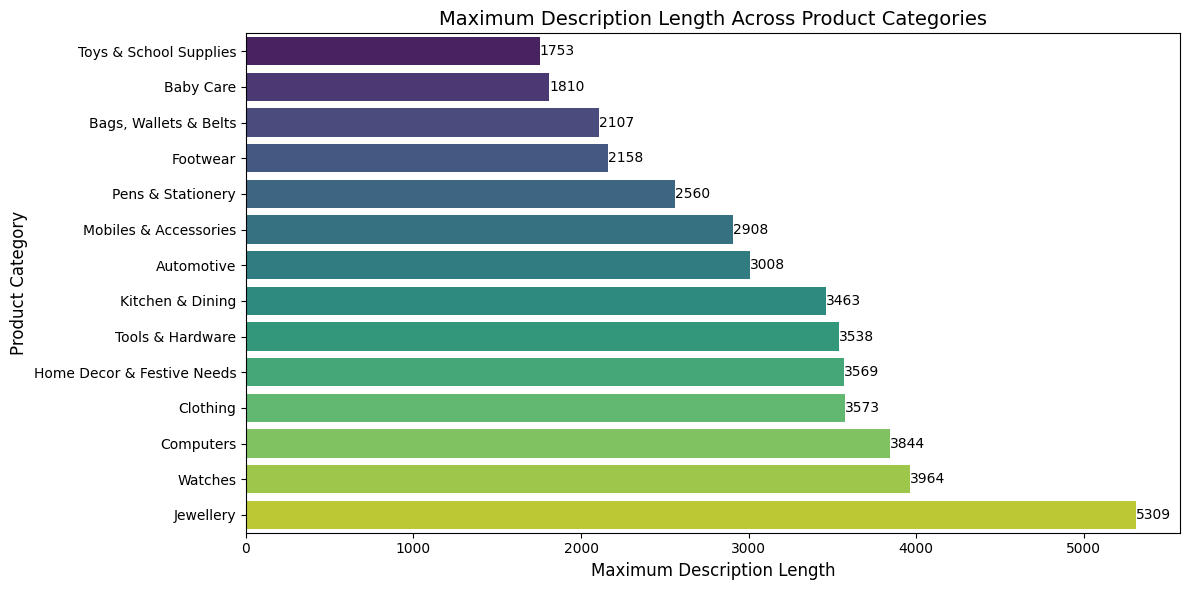

In [32]:
# Calculate the length of each description
products['description_length'] = products['description'].apply(len)

# Get the minimum description length for each category
max_desc_length_per_category = products.groupby('product_category')['description_length'].max().sort_values()

# Prepare data for visualization
categories = max_desc_length_per_category.index
max_lengths = max_desc_length_per_category.values

# Create a bar plot for minimum description lengths across categories
plt.figure(figsize=(12, 6))
sns.barplot(x=max_lengths, y=categories, palette="viridis")

# Add text annotations for minimum lengths
for index, value in enumerate(max_lengths):
    plt.text(value + 1, index, str(value), va='center', fontsize=10, color='black')

# Add labels and title
plt.xlabel("Maximum Description Length", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Maximum Description Length Across Product Categories", fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()


**Boxplot of the Average description length across all the categories**

From the boxplot, we can see that the average length for all the categories lies more or less around 1000 words. I decided to not go with a certain minimum/maximum words threshold to prevent loss of information.

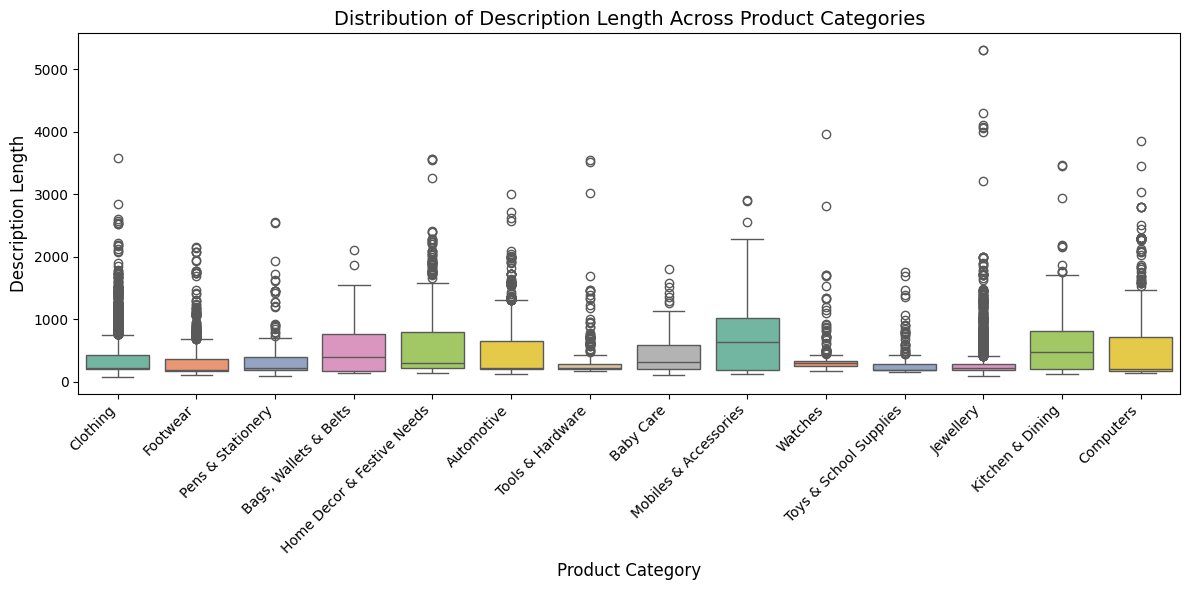

In [33]:
# Calculate the description length
products['description_length'] = products['description'].apply(len)

# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category', y='description_length', data=products, palette="Set2")

# Rotate category labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Description Length", fontsize=12)
plt.title("Distribution of Description Length Across Product Categories", fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()

### **Word Clouds**

**Word cloud consisting of the most frequent words in the Product Description**

This wordcloud shows the 200 most common words in the raw dataset that was provided. This wordcloud helped a lot to get an idea about removing words such as **[flpkart, replacement, geniuine, product, shipping, cash etc]** as these words are common to the context of all the categories and will not contribute much to predicting the category of a particular product.

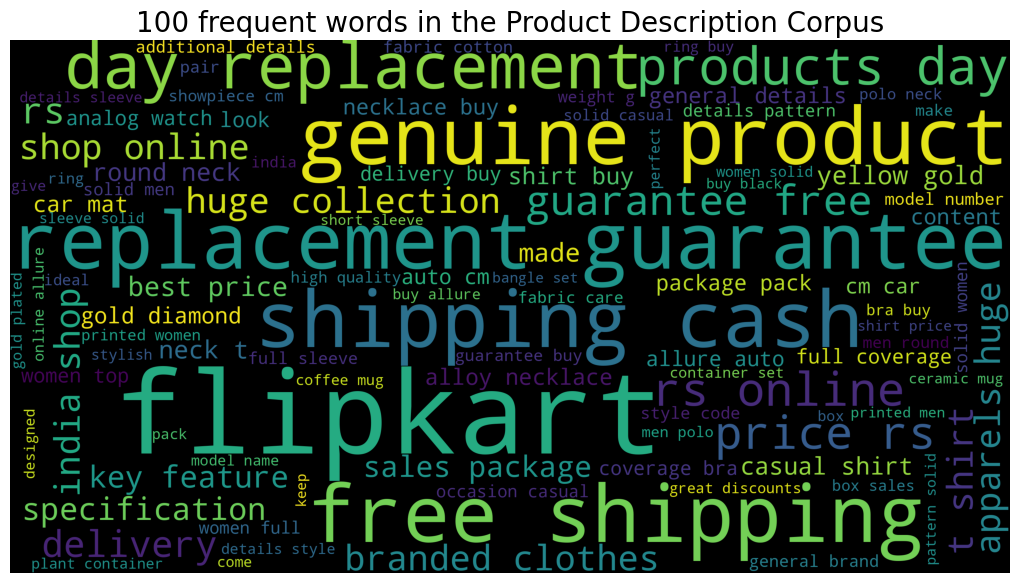

In [34]:
product_content = ""

for i in products["description"]:
    i = str(i)
    separate = i.split()
    for j in range(len(separate)):
        separate[j] = separate[j].lower()

    product_content += " ".join(separate)+" "

stop_words = set(STOPWORDS)
final_wordcloud = WordCloud(width = 3000, height = 1600,
                            max_words=100,
                            background_color ='black',
                            stopwords = stop_words,
                            min_font_size = 10).generate(product_content)

plt.figure(figsize = (10, 10), facecolor = None)
plt.title("100 frequent words in the Product Description Corpus", fontsize=20)
plt.imshow(final_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

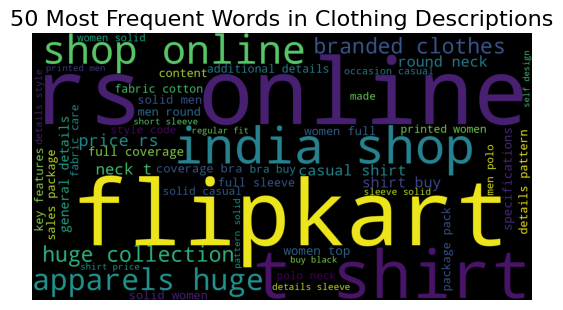

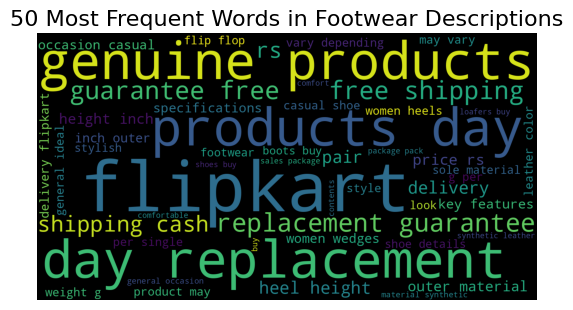

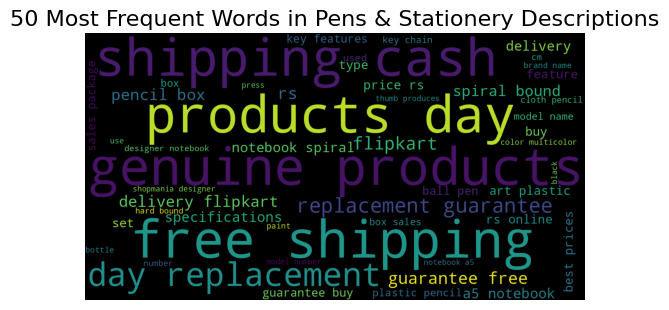

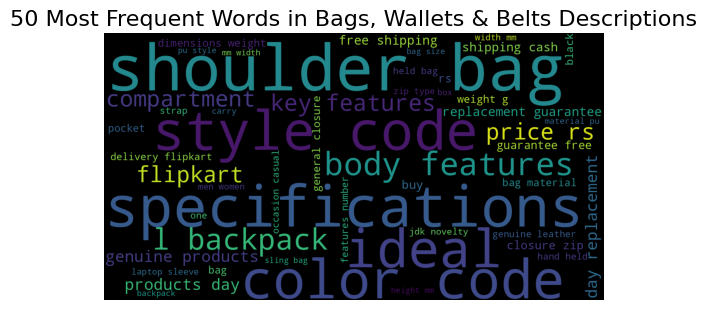

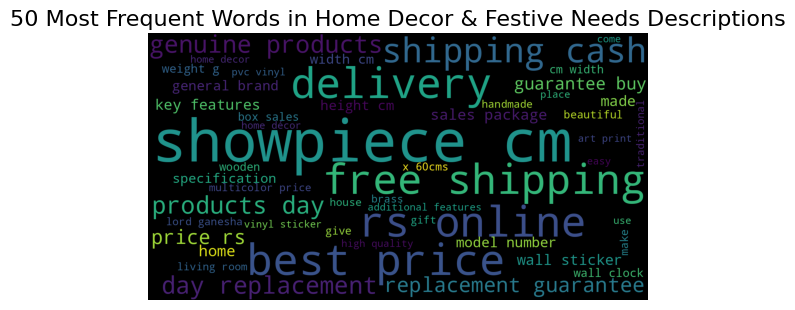

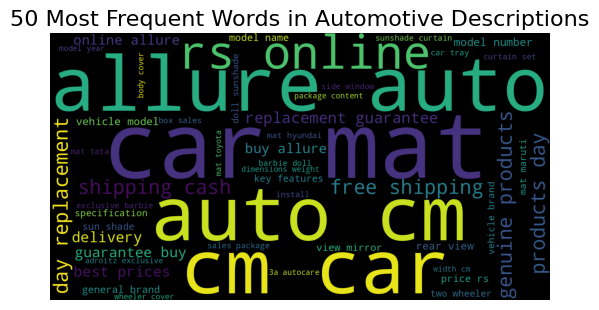

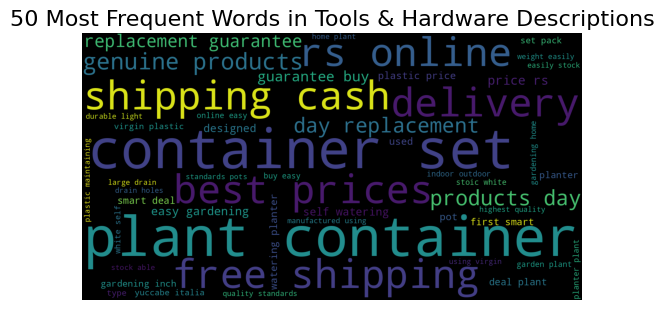

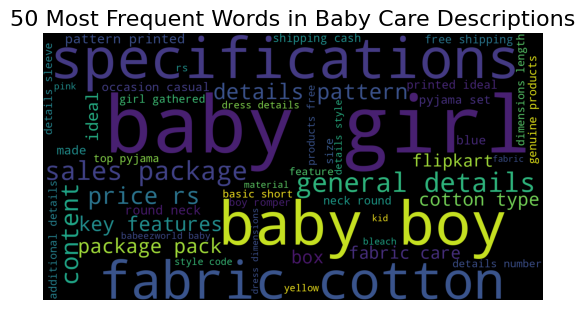

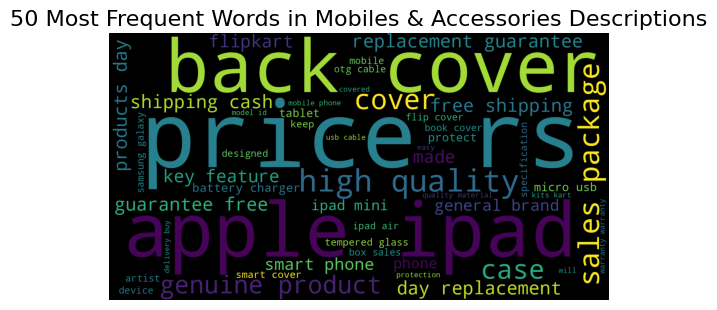

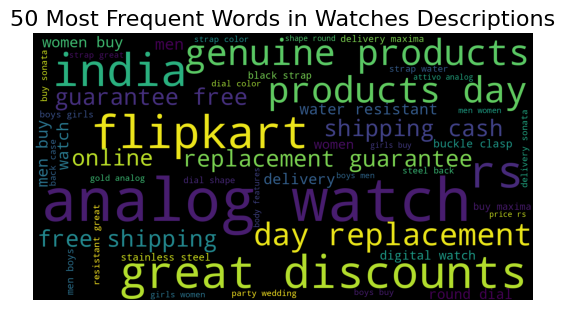

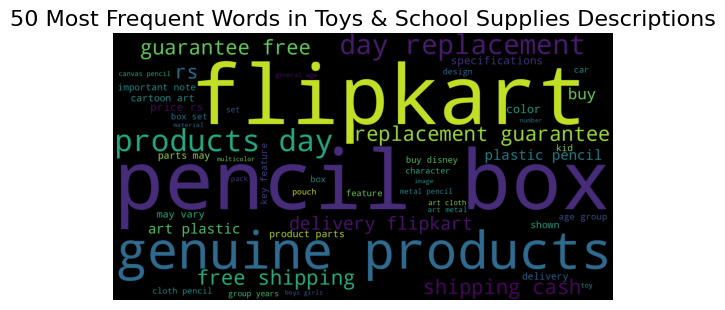

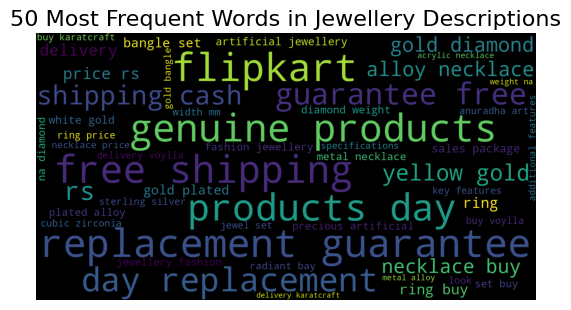

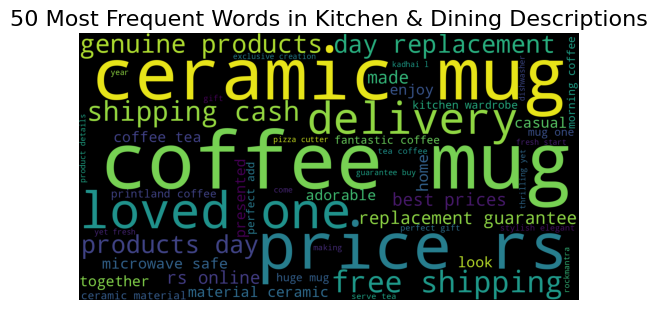

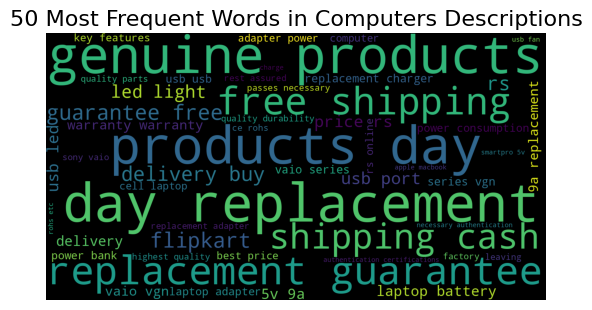

In [35]:
# Get unique categories
categories = products['product_category'].unique()

# Stop words for filtering
stop_words = set(STOPWORDS)

# Create word clouds for each category
for category in categories:
    # Filter descriptions for the current category
    category_descriptions = products[products['product_category'] == category]['description']

    # Concatenate all descriptions for the category
    category_content = " ".join([str(desc).lower() for desc in category_descriptions])

    # Generate word cloud
    wordcloud = WordCloud(
        width=1500,
        height=800,
        max_words=50,
        background_color='black',
        stopwords=stop_words,
        min_font_size=10
    ).generate(category_content)

    # Display the word cloud
    plt.figure(figsize=(5, 5), facecolor=None)
    plt.title(f"50 Most Frequent Words in {category} Descriptions", fontsize=16)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

plt.show()

### ***Data Cleaning and Pre Processing in Train & Test Data***

**Character Contraction**

Character contraction is done to look at what percentage of the dataset is in English Characters. Punctuations, numbers, hyperlinks, etc will all be removed during further cleaning of the dataset.

During this analysis of the characters, we can see that there are several emoticons, letters from different languages (Chinese), etc that can be seen. These are then removed from the corpus.

### **For train data**

In [36]:
corpus_train = ' '.join(products['description']).lower()
characters = Counter(corpus_train)
sorted(characters.items(), key=lambda i: i[1], reverse=True)

total=0
for i in ascii_letters+punctuation+digits:
  total+=characters[i]

print("The % of data consisting of only English Characters is {}.".format(100*total/len(' '.join(products['description']))))
print("\n")
print(characters)

The % of data consisting of only English Characters is 82.31818239676973.


Counter({' ': 922665, 'e': 458959, 'a': 343552, 'o': 320427, 'r': 297788, 't': 296895, 'i': 295022, 'n': 277981, 's': 262981, 'l': 240015, 'c': 181297, 'd': 150094, 'h': 131481, 'p': 129756, 'u': 124718, 'f': 112449, 'm': 107452, 'y': 98683, 'g': 95381, 'b': 76441, '.': 70178, 'w': 58573, 'k': 50006, 'v': 38268, ',': 27085, '0': 22367, '-': 19879, '1': 19577, '\t': 18598, '9': 16968, '\n': 14980, '3': 14055, ':': 12381, '2': 11993, "'": 11228, '5': 10584, '4': 9198, 'x': 9046, 'j': 7046, 'z': 6383, '8': 6156, '6': 5461, '!': 5051, '7': 4801, ')': 4604, 'q': 4492, '(': 4413, '&': 3977, '/': 2784, '"': 1250, '%': 738, '_': 694, '\r': 520, '\xa0': 466, '*': 385, '?': 313, ';': 307, '’': 307, '•': 258, '|': 218, '+': 167, 'é': 115, '”': 103, '=': 100, '“': 76, '@': 64, '–': 53, '#': 49, '�': 48, 'â': 39, '¢': 31, '\x80': 21, '°': 19, '…': 18, 'ã': 18, '®': 16, '✔': 15, '‚': 12, '±': 11, '\u2028': 10, '~': 8, '¬': 8

In [37]:
# getting all the words ending an apostrophe and single letter
contractions = Counter(re.findall("[a-z]+'[a-z]+", corpus_train))
apostrophe_end = sorted(contractions.items(), key=lambda i: i[1], reverse=True)
print("\n")
print(apostrophe_end)

# getting all the words starting with a single letter and an apostrophe
contractions=Counter(re.findall("[a-z]'[a-z]+", corpus_train))
apostrophe_start = sorted(contractions.items(), key=lambda i: i[1], reverse=True)
print("\n")
print(apostrophe_start)

#getting all the URLS
urls = re.findall('\(*http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))*', corpus_train)
print("\n")
print(urls)



[("women's", 5572), ("men's", 2705), ("girl's", 841), ("boy's", 524), ("don't", 131), ("you're", 114), ("it's", 69), ("doesn't", 40), ("nod'r", 33), ("customer's", 32), ("bra's", 30), ("you'll", 27), ("d'clair", 26), ("won't", 25), ("they're", 24), ("adapter's", 24), ("laptop's", 24), ("monitor's", 19), ("manufacturer's", 18), ("woman's", 17), ("today's", 16), ("bras's", 16), ("india's", 14), ("dede's", 13), ("phone's", 12), ("car's", 12), ("product's", 10), ("model's", 9), ("can't", 9), ("scheffer's", 9), ("what's", 8), ("wellworth's", 8), ("kid's", 8), ("company's", 8), ("computer's", 8), ("you'd", 7), ("vehicle's", 7), ("finger's", 7), ("seema's", 7), ("viewer's", 7), ("buyer's", 7), ("man's", 6), ("shirt's", 6), ("i'm", 6), ("chef'n", 6), ("kb's", 6), ("baby's", 6), ("l'appel", 6), ("l'elegantae", 6), ("lord's", 6), ("cat's", 5), ("vala's", 5), ("ona's", 5), ("one's", 5), ("asia's", 5), ("ruhi's", 5), ("lil'posh", 5), ("d'signer", 4), ("item's", 4), ("khadim's", 4), ("aren't", 4)

In [38]:
custom_contracts = {
    "women's" : "women",
    "men's" : "men",
    "girl's" : "girl",
    "boy's" : "boy",
    "don't" : "do not",
    "product's" : "product",
    "it's" : "its",
    "bra's" : "bras",
    "won't": "will not",
    "doesn't" : "does not",
    "l's" : " ",
    "n's" : " ",
    "y's" : " ",
    "n't" : "not",
    "r's" : "rs",
    "u're" : "your",
    "a's" : " ",
    "e's": " "
}

custom_stopwords = [w for w in set(stopwords.words("english"))]
custom_stopwords += list(punctuation)
stopwords_dataset = ["replacement","shipping","delivery","cash", "rs", "flipkart", "genuine", "details", "guarantee","free", "genuine", "flipkart.com"]
custom_stopwords.extend(stopwords_dataset)
wordnet_lemmatizer = WordNetLemmatizer()

In the following code snippet, the following things have been taken care of:

* Lowercasing
* Custom Contraction Mapping
* Keeping only the ascii characters in the corpus
* Removal of URLs/ Hyperlinks
* Removal of numbers and punctuations
* Custom Stopword Removal
* Lemmatization
* Removal of extra whitespaces


In [39]:
def clean(text):

  for i in range(len(text)):
    text[i] = text[i].lower()
    text[i] = text[i].replace("\n"," ")
    for keys,values in custom_contracts.items():
      text[i] = text[i].replace(keys,values)
    text[i] = re.sub("[a-z]'[a-z]+", " ", text[i])
    #removing the extra whitespaces
    text[i] = re.sub(' +', ' ', text[i])
    #keeping only the ascii characters -> handles emoticons, letters from other languages, etc
    text[i] = re.sub(r'[^\x00-\x7F]+',' ', text[i])
    #removing the urls
    text[i] = re.sub('[(]?http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])/)*', ' ', text[i])
    text[i] = ''.join([j for j in text[i] if not j.isdigit()])
    text[i] = text[i].split()
    text[i] = ' '.join([word for word in text[i] if word not in custom_stopwords])
    #removing the punctuations
    text[i] = re.sub(r'[^\w\s]', '', text[i])
    #lemmatization
    text[i] = [wordnet_lemmatizer.lemmatize(w) for w in word_tokenize(text[i])]
    #removing the words which have a length less than 3
    text[i] = [word for word in text[i] if len(word)>=3]

  return text

raw_description = products["description"].tolist()
cleaned_description = clean(raw_description)
print(cleaned_description[:5])

[['key', 'feature', 'alisha', 'solid', 'woman', 'cycling', 'short', 'cotton', 'lycra', 'navy', 'red', 'navyspecifications', 'alisha', 'solid', 'woman', 'cycling', 'short', 'short', 'number', 'content', 'sale', 'package', 'pack', 'fabric', 'cotton', 'lycra', 'type', 'cycling', 'short', 'general', 'pattern', 'solid', 'ideal', 'woman', 'fabric', 'care', 'gentle', 'machine', 'wash', 'lukewarm', 'water', 'bleach', 'additional', 'style', 'code', 'altht_p_', 'box', 'short'], ['key', 'feature', 'belly', 'sandal', 'wedge', 'heel', 'casualsaw', 'belly', 'price', 'material', 'synthetic', 'lifestyle', 'casual', 'heel', 'type', 'wedge', 'warranty', 'type', 'manufacturer', 'product', 'warranty', 'manufacturing', 'defect', 'day', 'care', 'instruction', 'allow', 'pair', 'shoe', 'air', 'deodorize', 'regular', 'basis', 'use', 'shoe', 'bag', 'prevent', 'stain', 'mildew', 'dust', 'dry', 'dirt', 'surface', 'using', 'clean', 'cloth', 'use', 'polish', 'shinerspecifications', 'belly', 'general', 'ideal', 'wom

### **Visualisation of the cleaned Dataset**

**Visualisation of the most common words**

40 most common words are plotted in the form of a bargraph after removal of the unnecessary data. From the bargraph, we can clearly see that these are the words which actually can help us in identifying the particular category of a product.

<Axes: title={'center': '40 Most Common Words relevant to Dataset'}, xlabel='Frequency', ylabel='Words'>

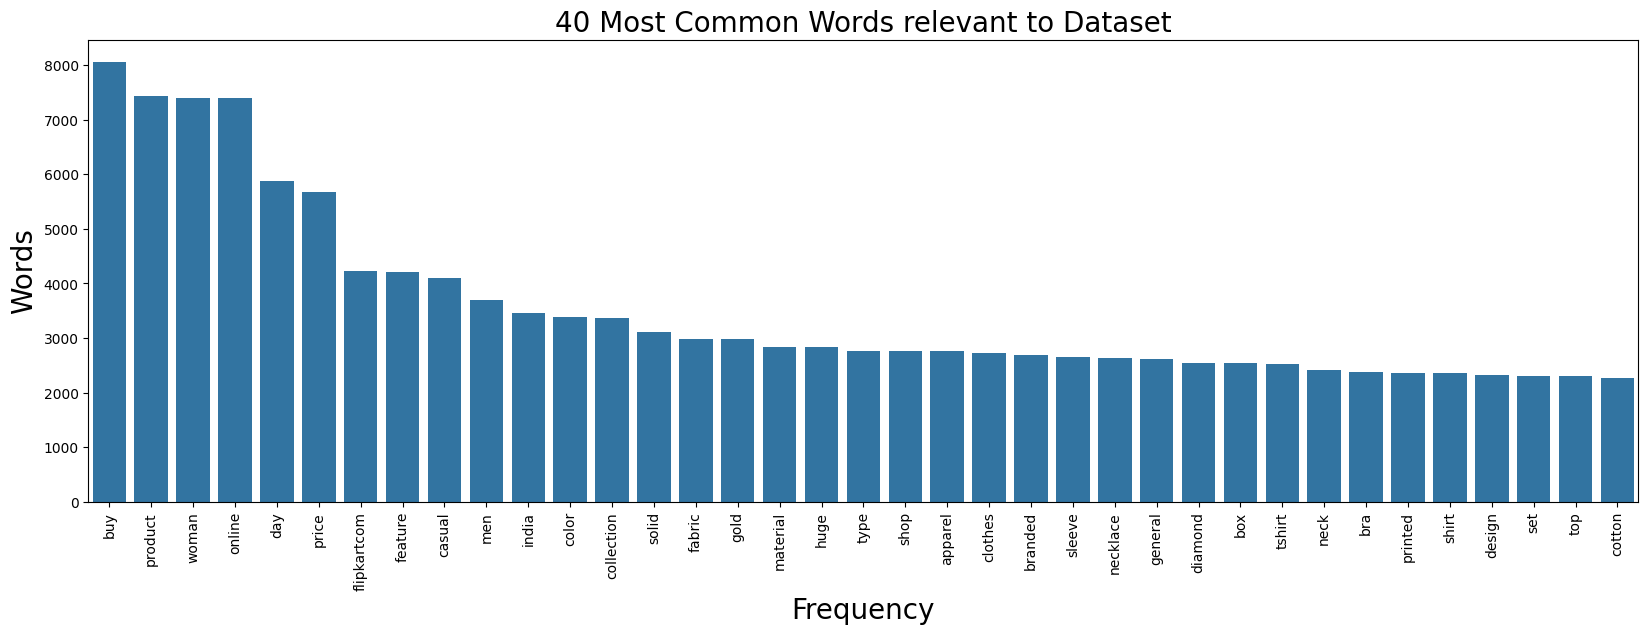

In [40]:
corpus_train = []
for text in cleaned_description:
  for word in text:
    corpus_train.append(word)

counter = Counter(corpus_train)
most=counter.most_common()
x, y = [], []
for word,count in most[:40]:
  if (word not in custom_stopwords):
    x.append(word)
    y.append(count)

plt.figure(figsize=(20,6))
plt.title("40 Most Common Words relevant to Dataset", fontsize=20)
plt.ylabel("Words", fontsize=20)
plt.xlabel("Frequency", fontsize=20)
plt.xticks(rotation=90)
sns.barplot(x=x,y=y)

In [41]:
temp_cleaned_description = [" ".join(sentence) for sentence in cleaned_description]
products["cleaned_desc"] = temp_cleaned_description
products.head(10)

,product_category_tree,description,product_category,description_length,cleaned_desc
0,Clothing,Key Features of Alisha Solid Women's Cycling S...,Clothing,410,key feature alisha solid woman cycling short c...
1,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,650,key feature belly sandal wedge heel casualsaw ...
2,Clothing,Key Features of Alisha Solid Women's Cycling S...,Clothing,403,key feature alisha solid woman cycling short c...
3,Clothing,Key Features of Alisha Solid Women's Cycling S...,Clothing,416,key feature alisha solid woman cycling short c...
4,Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,428,key feature dilli bazaaar belly corporate casu...
5,Clothing,Key Features of Alisha Solid Women's Cycling S...,Clothing,419,key feature alisha solid woman cycling short c...
6,Footwear,Key Features of Ladela Bellies Brand: LADELA C...,Footwear,358,key feature ladela belly brand ladela color bl...
7,Clothing,Key Features of Carrel Printed Women's Fabric:...,Clothing,1182,key feature carrel printed woman fabric swimly...
8,Clothing,Key Features of Alisha Solid Women's Cycling S...,Clothing,414,key feature alisha solid woman cycling short c...
9,Pens & Stationery,Specifications of Freelance Vacuum Bottles 350...,Pens & Stationery,216,specification freelance vacuum bottle bottle p...


### **For Test data**

In [42]:
#for test data
corpus_test = ' '.join(products_test['description']).lower()
characters = Counter(corpus_test)
sorted(characters.items(), key=lambda i: i[1], reverse=True)

total=0
for i in ascii_letters+punctuation+digits:
  total+=characters[i]

print("The % of data consisting of only English Characters is {}.".format(100*total/len(' '.join(products_test['description']))))
print("\n")
print(characters)

The % of data consisting of only English Characters is 82.85368314127203.


Counter({' ': 190236, 'e': 101870, 'a': 74963, 't': 66102, 'i': 65585, 'o': 65292, 'r': 62096, 's': 60424, 'n': 57436, 'l': 49120, 'c': 37513, 'd': 32440, 'h': 29121, 'p': 26630, 'm': 24382, 'u': 23759, 'f': 23548, 'g': 19614, 'y': 18451, 'b': 17123, 'w': 13388, 'k': 10546, '.': 9447, 'v': 6941, ',': 6789, '1': 4190, '-': 4013, '0': 3925, ':': 3251, '\t': 3054, '2': 2819, 'x': 2622, "'": 2523, '9': 2397, '\n': 2242, 'z': 2052, '3': 2035, '5': 2021, 'j': 1674, '4': 1566, ')': 1511, '(': 1483, '6': 1103, '8': 944, 'q': 900, '&': 851, '7': 768, '/': 634, '!': 384, '%': 219, '_': 134, '\xa0': 131, '"': 103, '’': 72, '*': 69, ';': 54, '?': 49, '+': 45, '•': 44, '\r': 39, 'â': 20, '…': 18, '�': 14, '\x80': 14, '¢': 12, '°': 11, '@': 10, 'é': 10, '[': 10, ']': 10, '⁃': 8, '‘': 8, '–': 7, '{': 6, '}': 6, '\uf0d8': 6, '#': 5, '¡': 5, '́': 4, '“': 4, '”': 4, '`': 3, '~': 2, '>': 2, '\x9c': 2, '\x9d': 2, '™': 2, 'ã': 2, '

In [43]:
# getting all the words ending an apostrophe and single letter
contractions = Counter(re.findall("[a-z]+'[a-z]+", corpus_test))
apostrophe_end = sorted(contractions.items(), key=lambda i: i[1], reverse=True)
print("\n")
print(apostrophe_end)

# getting all the words starting with a single letter and an apostrophe
contractions=Counter(re.findall("[a-z]'[a-z]+", corpus_test))
apostrophe_start = sorted(contractions.items(), key=lambda i: i[1], reverse=True)
print("\n")
print(apostrophe_start)

#getting all the URLS
urls = re.findall('\(*http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))*', corpus_test)
print("\n")
print(urls)



[("women's", 1488), ("men's", 419), ("boy's", 248), ("girl's", 173), ("don't", 24), ("l'appel", 16), ("it's", 12), ("doesn't", 11), ("manufacturer's", 6), ("wearer's", 6), ("world's", 5), ("india's", 5), ("you're", 5), ("kada's", 4), ("you'd", 4), ("sea's", 4), ("one's", 3), ("pyjama's", 3), ("car's", 3), ("cynthia's", 3), ("a's", 2), ("baby's", 2), ("montana's", 2), ("d'nt", 2), ("pegs'n", 2), ("you've", 2), ("that's", 2), ("phone's", 2), ("isn't", 2), ("was't", 2), ("won't", 2), ("you'll", 2), ("l'elegantae", 2), ("today's", 2), ("kirti's", 2), ("lord's", 2), ("child's", 1), ("everyone's", 1), ("kid's", 1), ("id's", 1), ("platignum's", 1), ("little's", 1), ("can't", 1), ("student's", 1), ("jacadi's", 1), ("body's", 1), ("joy's", 1), ("d'panache", 1), ("they're", 1), ("stand's", 1), ("we've", 1), ("shouldn't", 1), ("shutoraru's", 1), ("karoz's", 1)]


[("n's", 1907), ("y's", 254), ("l's", 173), ("n't", 41), ("a's", 23), ("l'appel", 16), ("r's", 15), ("t's", 15), ("d's", 11), ("e's",

In [44]:
custom_contracts = {
    "women's" : "women",
    "men's" : "men",
    "girl's" : "girl",
    "boy's" : "boy",
    "don't" : "do not",
    "product's" : "product",
    "it's" : "its",
    "bra's" : "bras",
    "won't": "will not",
    "doesn't" : "does not",
    "l's" : " ",
    "n's" : " ",
    "y's" : " ",
    "n't" : "not",
    "r's" : "rs",
    "u're" : "your",
    "a's" : " ",
    "e's": " "
}

custom_stopwords = [w for w in set(stopwords.words("english"))]
custom_stopwords += list(punctuation)
stopwords_dataset = ["replacement","shipping","delivery","cash", "rs", "flipkart", "genuine", "details", "guarantee","free", "genuine", "flipkart.com"]
custom_stopwords.extend(stopwords_dataset)
wordnet_lemmatizer = WordNetLemmatizer()

In [45]:
def clean(text):

  for i in range(len(text)):
    text[i] = text[i].lower()
    text[i] = text[i].replace("\n"," ")
    for keys,values in custom_contracts.items():
      text[i] = text[i].replace(keys,values)
    text[i] = re.sub("[a-z]'[a-z]+", " ", text[i])
    #removing the extra whitespaces
    text[i] = re.sub(' +', ' ', text[i])
    #keeping only the ascii characters -> handles emoticons, letters from other languages, etc
    text[i] = re.sub(r'[^\x00-\x7F]+',' ', text[i])
    #removing the urls
    text[i] = re.sub('[(]?http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])/)*', ' ', text[i])
    text[i] = ''.join([j for j in text[i] if not j.isdigit()])
    text[i] = text[i].split()
    text[i] = ' '.join([word for word in text[i] if word not in custom_stopwords])
    #removing the punctuations
    text[i] = re.sub(r'[^\w\s]', '', text[i])
    #lemmatization
    text[i] = [wordnet_lemmatizer.lemmatize(w) for w in word_tokenize(text[i])]
    #removing the words which have a length less than 3
    text[i] = [word for word in text[i] if len(word)>=3]

  return text

raw_description = products_test["description"].tolist()
cleaned_description = clean(raw_description)
print(cleaned_description[:5])

[['art', 'brass', 'bracelet', 'buy', 'art', 'brass', 'bracelet', 'flipkartcom', 'product', 'day', 'guarantee', 'shipping', 'delivery'], ['kalpaveda', 'copper', 'copper', 'cuff', 'price', 'attract', 'emit', 'divine', 'consciousness', 'wearing', 'copper', 'bracelet', 'cuff', 'copper', 'known', 'antioxidant', 'property', 'help', 'reduce', 'joint', 'pain', 'gain', 'freedom', 'movement', 'throughout', 'body', 'copper', 'product', 'verified', 'pure', 'intertek', 'copper', 'soft', 'metal', 'therefore', 'use', 'brass', 'insert', 'ensure', 'product', 'retain', 'shape', 'last', 'long', 'ayurveda', 'recommends', 'wearing', 'copper', 'jewellery', 'benefit', 'multiple', 'benefitsall', 'mentioned', 'health', 'benefit', 'recommended', 'ayurveda', 'they', 'verified', 'doctor', 'rub', 'copper', 'product', 'lemon', 'covered', 'salt', 'gently', 'wash', 'wipe', 'soft', 'cloth', 'sparkling', 'result', 'attract', 'emit', 'divine', 'consciousness', 'wearing', 'copper', 'bracelet', 'cuff', 'copper', 'known', 

<Axes: title={'center': '30 Most Common Words relevant to Test Dataset'}, xlabel='Frequency', ylabel='Words'>

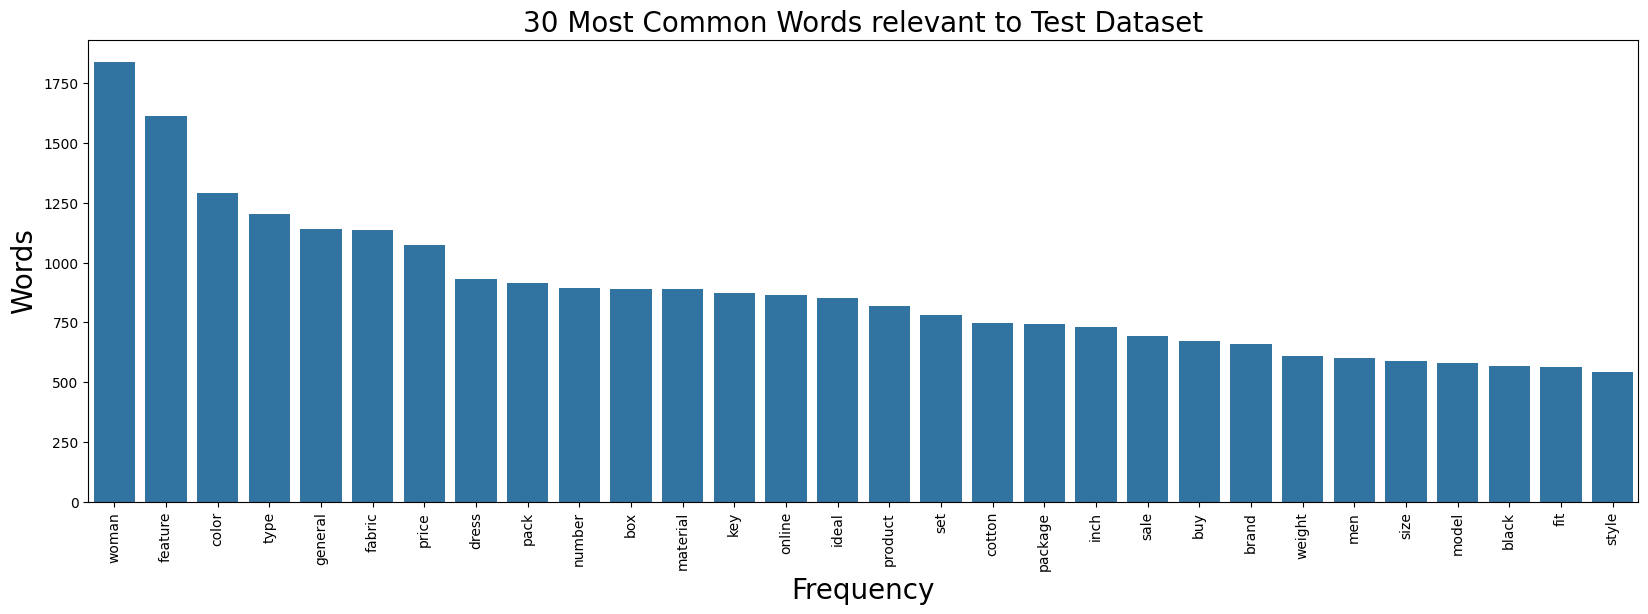

In [46]:
corpus_test = []
for text in cleaned_description:
  for word in text:
    corpus_test.append(word)

counter = Counter(corpus_test)
most=counter.most_common()
x, y = [], []
for word,count in most[:30]:
  if (word not in custom_stopwords):
    x.append(word)
    y.append(count)

plt.figure(figsize=(20,6))
plt.title("30 Most Common Words relevant to Test Dataset", fontsize=20)
plt.ylabel("Words", fontsize=20)
plt.xlabel("Frequency", fontsize=20)
plt.xticks(rotation=90)
sns.barplot(x=x,y=y)

In [47]:
temp_cleaned_description = [" ".join(sentence) for sentence in cleaned_description]
products_test["cleaned_desc"] = temp_cleaned_description
products_test.head(10)

,description,cleaned_desc
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,art brass bracelet buy art brass bracelet flip...
1,Kalpaveda Copper Copper Cuff\n ...,kalpaveda copper copper cuff price attract emi...
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...,thelostpuppy book cover apple ipad air multico...
3,Riana Copper Copper Bangle - Buy Riana Copper ...,riana copper copper bangle buy riana copper co...
4,Inox Jewelry Stainless Steel Cuff\n ...,inox jewelry stainless steel cuff price inox j...
5,Thelostpuppy Book Cover for Apple iPad Air 2 (...,thelostpuppy book cover apple ipad air multico...
6,Ridhi Sidhi Collection Brass Bangle Set (Pack ...,ridhi sidhi collection brass bangle set pack p...
7,Theskinmantra Sleeve for All versions of Apple...,theskinmantra sleeve version apple ipad multic...
8,TheLostPuppy Back Cover for Apple iPad Air 2 (...,thelostpuppy back cover apple ipad air multico...
9,Intex Happy Animal Chair Assortment Inflatable...,intex happy animal chair assortment inflatable...


In [48]:
products.head()

,product_category_tree,description,product_category,description_length,cleaned_desc
0,Clothing,Key Features of Alisha Solid Women's Cycling S...,Clothing,410,key feature alisha solid woman cycling short c...
1,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,650,key feature belly sandal wedge heel casualsaw ...
2,Clothing,Key Features of Alisha Solid Women's Cycling S...,Clothing,403,key feature alisha solid woman cycling short c...
3,Clothing,Key Features of Alisha Solid Women's Cycling S...,Clothing,416,key feature alisha solid woman cycling short c...
4,Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,428,key feature dilli bazaaar belly corporate casu...


In [49]:
products_test.head()

,description,cleaned_desc
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,art brass bracelet buy art brass bracelet flip...
1,Kalpaveda Copper Copper Cuff\n ...,kalpaveda copper copper cuff price attract emi...
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...,thelostpuppy book cover apple ipad air multico...
3,Riana Copper Copper Bangle - Buy Riana Copper ...,riana copper copper bangle buy riana copper co...
4,Inox Jewelry Stainless Steel Cuff\n ...,inox jewelry stainless steel cuff price inox j...


**Encoding of the Product Classes**
In order to plot the ROC Curves and find the AUC score, there was a need to have a proper encoding for the 14 primary categories (in both directions). Hence, two of the following dictionaries are created to create a mapping.

In [50]:
#helper dictionaries created which are later used to manipulate the testing output into suitable form before plotting the ROC Curves

category_mapping = {  0	: "Clothing",
                      1	: "jewellery",
                      2	: "Footwear",
                      3	: "Automotive",
                      4	: "Home Decor & Festive Needs",
                      5	: "Kitchen & Dining",
                      6	: "Computers",
                      7	: "Watches",
                      8	: "Mobiles & Accessories",
                      9	: "Tools & Hardware",
                      10 : "Toys & School Supplies",
                      11 : "Pens & Stationery",
                      12 : "Baby Care",
                      13 : "Bags, Wallets & Belts"
                      	}

reverse_category_mapping = {
    "Clothing": 0,
    "Jewellery": 1,
    "Footwear": 2,
    "Automotive": 3,
    "Home Decor & Festive Needs": 4,
    "Kitchen & Dining": 5,
    "Computers": 6,
    "Watches": 7,
    "Mobiles & Accessories": 8,
    "Tools & Hardware": 9,
    "Toys & School Supplies": 10,
    "Pens & Stationery": 11,
    "Baby Care": 12,
    "Bags, Wallets & Belts": 13,
}

**1) Logistic Regression (Binary Classification Method)**

In [51]:
from sklearn.linear_model import LogisticRegression

def logistic_regression(train_data, test_data):
    # Define the feature (description) and target (product_category) columns
    x_train = train_data['cleaned_desc']  # cleaned description in train data
    y_train = train_data['product_category']  # target labels in train data

    x_test = test_data['cleaned_desc']  # cleaned description in test data

    # Splitting the dataset into training and test parts (for internal validation)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # Bag of words implementation
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train).toarray()
    x_val = cv.transform(x_val).toarray()

    # TF-IDF implementation
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train).toarray()
    x_val = vector.transform(x_val).toarray()

    # Initialize the logistic regression model
    lr_model = LogisticRegression(max_iter=1000)

    # Fitting the model with training data
    lr_model.fit(x_train, y_train)

    # Predict on the validation set
    lr_predict = lr_model.predict(x_val)

    # Evaluation metrics for the validation data
    print("Validation Accuracy: ", accuracy_score(y_val, lr_predict))
    print("\n*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_val, lr_predict))
    print("\n*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_val, lr_predict))

    # Now apply the model to the test data (products_test)
    x_test = cv.transform(x_test)  # Apply CountVectorizer on test data
    x_test = vector.transform(x_test)  # Apply TF-IDF on test data

    # Predict the product category for test data
    lr_test_predict = lr_model.predict(x_test)
    lr_test_pred_prob = lr_model.predict_proba(x_test)

    # Returning the predictions for the test data
    return lr_test_predict, lr_test_pred_prob

# Call the function with the train and test data
lr_predictions, lr_pred_probabilities = logistic_regression(products, products_test)

# You can now add these predictions to the test dataframe (products_test)
products_test['predicted_category'] = lr_predictions

# Show the test data with the predicted categories
products_test.head(10)

Validation Accuracy:  0.9699962020508925

*********** CONFUSION MATRIX **************
[[196   0   0   1   0   0   0   0   1   1   0   0   0   0]
 [  0  32   1  12   0   1   4   2   0   0   0   0   0   0]
 [  0   0  26   4   0   2   0   0   0   0   0   0   0   0]
 [  0   1   0 908   0   0   0   2   0   0   0   0   0   0]
 [  0   0   1   0  89   0   0   0   0   3   0   0   0   0]
 [  0   0   0   3   0 176   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 132   0   2   0   0   0   0   0]
 [  0   0   0   1   0   0   0 557   0   0   0   0   0   0]
 [  0   0   0   1   0   2   0   0 115   0   0   0   0   0]
 [  1   0   0   1   2   0   0   0   0 105   0   0   0   0]
 [  0   0   0   1   0   0   3   2   0   0  26   0   7   0]
 [  0   0   0   4   0   0   1   0   0   0   0  66   0   0]
 [  3   0   0   2   1   0   0   0   0   0   2   0  42   0]
 [  0   0   0   4   0   0   0   0   0   0   0   0   0  84]]

*********** CLASSIFICATION REPORT **************
                            precision

,description,cleaned_desc,predicted_category
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,art brass bracelet buy art brass bracelet flip...,Jewellery
1,Kalpaveda Copper Copper Cuff\n ...,kalpaveda copper copper cuff price attract emi...,Jewellery
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
3,Riana Copper Copper Bangle - Buy Riana Copper ...,riana copper copper bangle buy riana copper co...,Jewellery
4,Inox Jewelry Stainless Steel Cuff\n ...,inox jewelry stainless steel cuff price inox j...,Jewellery
5,Thelostpuppy Book Cover for Apple iPad Air 2 (...,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
6,Ridhi Sidhi Collection Brass Bangle Set (Pack ...,ridhi sidhi collection brass bangle set pack p...,Jewellery
7,Theskinmantra Sleeve for All versions of Apple...,theskinmantra sleeve version apple ipad multic...,Mobiles & Accessories
8,TheLostPuppy Back Cover for Apple iPad Air 2 (...,thelostpuppy back cover apple ipad air multico...,Mobiles & Accessories
9,Intex Happy Animal Chair Assortment Inflatable...,intex happy animal chair assortment inflatable...,Clothing


**2) Logistic Regression (Multiclass Classification Method)**

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def logistic_regression_multiclass(train_data, test_data):
    # Define the feature (description) and target (product_category) columns
    x_train = train_data['cleaned_desc']  # cleaned description in train data
    y_train = train_data['product_category']  # target labels in train data

    x_test = test_data['cleaned_desc']  # cleaned description in test data

    # Splitting the dataset into training and validation parts (for internal validation)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # Apply CountVectorizer on the training data (fit_transform) and validation/test data (transform)
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train)
    x_val = cv.transform(x_val)
    x_test_transformed = cv.transform(x_test)

    # Apply TF-IDF on the transformed data (training, validation, and test data)
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train)
    x_val = vector.transform(x_val)
    x_test_transformed = vector.transform(x_test_transformed)

    # Initialize the logistic regression model for multiclass classification
    lr_model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

    # Fitting the model with training data
    lr_model.fit(x_train, y_train)

    # Predict on the validation set
    lr_predict = lr_model.predict(x_val)

    # Evaluation metrics for the validation data
    print("Validation Accuracy: ", accuracy_score(y_val, lr_predict))
    print("\n*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_val, lr_predict))
    print("\n*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_val, lr_predict))

    # Predict the product category for test data (products_test)
    lr_test_predict = lr_model.predict(x_test_transformed)
    lr_test_pred_prob = lr_model.predict_proba(x_test_transformed)

       # Returning the predictions for the test data
    return lr_test_predict, lr_test_pred_prob

# Call the function with the train and test data
lr_predictions, lr_pred_probabilities = logistic_regression_multiclass(products, products_test)

# You can now add these predictions to the test dataframe (products_test)
products_test['predicted_category'] = lr_predictions

# Show the test data with the predicted categories
products_test.head(10)


Validation Accuracy:  0.9699962020508925

*********** CONFUSION MATRIX **************
[[196   0   0   1   0   0   0   0   1   1   0   0   0   0]
 [  0  32   1  12   0   1   4   2   0   0   0   0   0   0]
 [  0   0  26   4   0   2   0   0   0   0   0   0   0   0]
 [  0   1   0 908   0   0   0   2   0   0   0   0   0   0]
 [  0   0   1   0  89   0   0   0   0   3   0   0   0   0]
 [  0   0   0   3   0 176   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 132   0   2   0   0   0   0   0]
 [  0   0   0   1   0   0   0 557   0   0   0   0   0   0]
 [  0   0   0   1   0   2   0   0 115   0   0   0   0   0]
 [  1   0   0   1   2   0   0   0   0 105   0   0   0   0]
 [  0   0   0   1   0   0   3   2   0   0  26   0   7   0]
 [  0   0   0   4   0   0   1   0   0   0   0  66   0   0]
 [  3   0   0   2   1   0   0   0   0   0   2   0  42   0]
 [  0   0   0   4   0   0   0   0   0   0   0   0   0  84]]

*********** CLASSIFICATION REPORT **************
                            precision

,description,cleaned_desc,predicted_category
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,art brass bracelet buy art brass bracelet flip...,Jewellery
1,Kalpaveda Copper Copper Cuff\n ...,kalpaveda copper copper cuff price attract emi...,Jewellery
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
3,Riana Copper Copper Bangle - Buy Riana Copper ...,riana copper copper bangle buy riana copper co...,Jewellery
4,Inox Jewelry Stainless Steel Cuff\n ...,inox jewelry stainless steel cuff price inox j...,Jewellery
5,Thelostpuppy Book Cover for Apple iPad Air 2 (...,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
6,Ridhi Sidhi Collection Brass Bangle Set (Pack ...,ridhi sidhi collection brass bangle set pack p...,Jewellery
7,Theskinmantra Sleeve for All versions of Apple...,theskinmantra sleeve version apple ipad multic...,Mobiles & Accessories
8,TheLostPuppy Back Cover for Apple iPad Air 2 (...,thelostpuppy back cover apple ipad air multico...,Mobiles & Accessories
9,Intex Happy Animal Chair Assortment Inflatable...,intex happy animal chair assortment inflatable...,Clothing


**3) Multinomial Naive Bayes Classifier**

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

def naive_bayes(train_data, test_data):
    # Define the feature (description) and target (product_category) columns
    x_train = train_data['cleaned_desc']  # cleaned description in train data
    y_train = train_data['product_category']  # target labels in train data

    x_test = test_data['cleaned_desc']  # cleaned description in test data

    # Splitting the dataset into training and validation parts (for internal validation)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # Apply CountVectorizer on the training data (fit_transform) and validation/test data (transform)
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train)
    x_val = cv.transform(x_val)
    x_test_transformed = cv.transform(x_test)

    # Apply TF-IDF on the transformed data (training, validation, and test data)
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train)
    x_val = vector.transform(x_val)
    x_test_transformed = vector.transform(x_test_transformed)

    # Initialize the Multinomial Naive Bayes model for multiclass classification
    nb_model = MultinomialNB()

    # Fitting the model with training data
    nb_model.fit(x_train, y_train)

    # Predict on the validation set
    nb_predict = nb_model.predict(x_val)

    # Evaluation metrics for the validation data
    print("Validation Accuracy: ", accuracy_score(y_val, nb_predict))
    print("\n*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_val, nb_predict))
    print("\n*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_val, nb_predict))

    # Predict the product category for test data (products_test)
    nb_test_predict = nb_model.predict(x_test_transformed)
    nb_test_pred_prob = nb_model.predict_proba(x_test_transformed)

    # Returning the predictions for the test data
    return nb_test_predict, nb_test_pred_prob

# Call the function with the train and test data
nb_predictions, nb_pred_probabilities = naive_bayes(products, products_test)

# You can now add these predictions to the test dataframe (products_test)
products_test['predicted_category'] = nb_predictions

# Show the test data with the predicted categories
products_test.head(10)

Validation Accuracy:  0.8997341435624763

*********** CONFUSION MATRIX **************
[[194   0   0   3   0   0   0   1   0   1   0   0   0   0]
 [  1   0   0  39   0   0   2  10   0   0   0   0   0   0]
 [  0   0   0  21   0   0   0  11   0   0   0   0   0   0]
 [  0   0   0 909   0   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0  69   0   0  21   0   3   0   0   0   0]
 [  0   0   0   7   0 167   0   5   0   0   0   0   0   0]
 [  1   0   0   5   0   1 103  24   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0 557   0   0   0   0   0   0]
 [  2   0   0   5   0   0   0   9 102   0   0   0   0   0]
 [  2   0   0   2   0   0   0   6   0  99   0   0   0   0]
 [  1   0   0   4   0   0   0  25   0   1   8   0   0   0]
 [  0   0   0   1   1   0   1   5   0   0   0  63   0   0]
 [  3   0   0   5   0   0   0  28   0   0   0   0  14   0]
 [  0   0   0   4   0   0   0   0   0   0   0   0   0  84]]

*********** CLASSIFICATION REPORT **************
                            precision

,description,cleaned_desc,predicted_category
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,art brass bracelet buy art brass bracelet flip...,Jewellery
1,Kalpaveda Copper Copper Cuff\n ...,kalpaveda copper copper cuff price attract emi...,Jewellery
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
3,Riana Copper Copper Bangle - Buy Riana Copper ...,riana copper copper bangle buy riana copper co...,Jewellery
4,Inox Jewelry Stainless Steel Cuff\n ...,inox jewelry stainless steel cuff price inox j...,Jewellery
5,Thelostpuppy Book Cover for Apple iPad Air 2 (...,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
6,Ridhi Sidhi Collection Brass Bangle Set (Pack ...,ridhi sidhi collection brass bangle set pack p...,Jewellery
7,Theskinmantra Sleeve for All versions of Apple...,theskinmantra sleeve version apple ipad multic...,Mobiles & Accessories
8,TheLostPuppy Back Cover for Apple iPad Air 2 (...,thelostpuppy back cover apple ipad air multico...,Mobiles & Accessories
9,Intex Happy Animal Chair Assortment Inflatable...,intex happy animal chair assortment inflatable...,Clothing


**4) Linear Support Vector Machine**

In [54]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def linear_svm(train_data, test_data):
    # Define the feature (description) and target (product_category) columns
    x_train = train_data['cleaned_desc']  # cleaned description in train data
    y_train = train_data['product_category']  # target labels in train data

    x_test = test_data['cleaned_desc']  # cleaned description in test data

    # Splitting the dataset into training and validation parts (for internal validation)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # Apply CountVectorizer on the training data (fit_transform) and validation/test data (transform)
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train)
    x_val = cv.transform(x_val)
    x_test_transformed = cv.transform(x_test)

    # Apply TF-IDF on the transformed data (training, validation, and test data)
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train)
    x_val = vector.transform(x_val)
    x_test_transformed = vector.transform(x_test_transformed)

    # Initialize the Linear SVC model
    svc_model = LinearSVC(random_state=42, max_iter=2000)

    # Fitting the model with training data
    svc_model.fit(x_train, y_train)

    # Predict on the validation set
    svc_predict = svc_model.predict(x_val)

    # Evaluation metrics for the validation data
    print("Validation Accuracy: ", accuracy_score(y_val, svc_predict))
    print("\n*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_val, svc_predict))
    print("\n*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_val, svc_predict))

    # Predict the product category for test data (products_test)
    svc_test_predict = svc_model.predict(x_test_transformed)

    # Returning the predictions for the test data
    return svc_test_predict

# Call the function with the train and test data
svc_predictions = linear_svm(products, products_test)

# You can now add these predictions to the test dataframe (products_test)
products_test['predicted_category'] = svc_predictions

# Show the test data with the predicted categories
products_test.head(10)

Validation Accuracy:  0.980630459551842

*********** CONFUSION MATRIX **************
[[198   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  0  41   0   7   0   0   2   0   0   0   1   0   1   0]
 [  0   0  29   2   0   1   0   0   0   0   0   0   0   0]
 [  0   4   0 905   0   0   0   2   0   0   0   0   0   0]
 [  0   0   1   0  91   0   0   0   0   1   0   0   0   0]
 [  0   0   0   2   0 177   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 131   0   2   0   1   0   0   0]
 [  0   0   0   1   0   0   0 557   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 118   0   0   0   0   0]
 [  2   0   0   0   1   0   0   0   0 106   0   0   0   0]
 [  0   0   0   0   0   0   1   1   0   0  30   1   6   0]
 [  0   0   0   0   0   0   1   0   0   0   0  70   0   0]
 [  2   0   0   1   0   0   0   0   0   0   6   0  41   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  88]]

*********** CLASSIFICATION REPORT **************
                            precision 

,description,cleaned_desc,predicted_category
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,art brass bracelet buy art brass bracelet flip...,Jewellery
1,Kalpaveda Copper Copper Cuff\n ...,kalpaveda copper copper cuff price attract emi...,Jewellery
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
3,Riana Copper Copper Bangle - Buy Riana Copper ...,riana copper copper bangle buy riana copper co...,Jewellery
4,Inox Jewelry Stainless Steel Cuff\n ...,inox jewelry stainless steel cuff price inox j...,Jewellery
5,Thelostpuppy Book Cover for Apple iPad Air 2 (...,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
6,Ridhi Sidhi Collection Brass Bangle Set (Pack ...,ridhi sidhi collection brass bangle set pack p...,Jewellery
7,Theskinmantra Sleeve for All versions of Apple...,theskinmantra sleeve version apple ipad multic...,Mobiles & Accessories
8,TheLostPuppy Back Cover for Apple iPad Air 2 (...,thelostpuppy back cover apple ipad air multico...,Mobiles & Accessories
9,Intex Happy Animal Chair Assortment Inflatable...,intex happy animal chair assortment inflatable...,Baby Care


**5) Decision Trees Classifier**

In [55]:
def decision_trees(x, y, x_test):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.model_selection import train_test_split

    # Splitting the dataset into training and test parts (we will use 'products' for training)
    # Here 'x' and 'y' represent the features and target labels from the training data.
    # 'x' represents 'cleaned_desc' column, and 'y' represents 'product_category' column.
    x_train, x_test_split, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Bag of Words implementation (Converting text into a matrix of token counts)
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train).toarray()

    # TF-IDF implementation (Transforming the counts into term frequency-inverse document frequency)
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train).toarray()
    x_test_split = cv.transform(x_test_split)  # Transform test data using the same CountVectorizer
    x_test_split = vector.transform(x_test_split)  # Apply TF-IDF to the test data

    # Fitting the training dataset to the model (Training the Decision Tree model)
    dtree_model = DecisionTreeClassifier(max_depth=30)
    dtree_model.fit(x_train, y_train)  # Train the model with the training data

    # Predict on the test set
    dtree_predict = dtree_model.predict(x_test_split)  # Predicting categories for the test data
    dtree_pred_prob = dtree_model.predict_proba(x_test_split)  # Getting the probability estimates for each class

    # Evaluation metrics for the dataset
    print("Validation Accuracy: ", accuracy_score(y_test, dtree_predict))
    print("\n*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_test, dtree_predict))
    print("\n*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_test, dtree_predict))

    # Now, we will predict on the actual 'products_test' dataset
    x_test_final = cv.transform(x_test).toarray()  # Use the same vectorizer for transformation
    x_test_final = vector.transform(x_test_final)  # Apply the TF-IDF transformer

    # Predict categories for the test data
    dtree_test_predictions = dtree_model.predict(x_test_final)

    return dtree_test_predictions

# Extract the feature (cleaned_desc) and target (product_category) columns from the 'products' dataset
x_train = products['cleaned_desc']  # Features (cleaned description)
y_train = products['product_category']  # Target labels (product category)

# Use 'products_test' for prediction (no product_category in test data)
x_test = products_test['cleaned_desc']  # Features in test data (cleaned description)

# Call the function with the train data ('products') and test data ('products_test')
dtree_predictions = decision_trees(x_train, y_train, x_test)

# You can now add these predictions to the test dataframe ('products_test')
products_test['predicted_category'] = dtree_predictions

# Show the test data with the predicted categories
products_test.head(10)

Validation Accuracy:  0.9346752753513103

*********** CONFUSION MATRIX **************
[[192   0   0   1   1   0   2   0   1   2   0   0   0   0]
 [  0  30   0  10   0   1   3   0   3   2   3   0   0   0]
 [  1   0  24   5   0   1   0   0   1   0   0   0   0   0]
 [  0   4   0 894   0   1   2   3   2   4   1   0   0   0]
 [  0   0   3   1  85   0   0   0   1   2   1   0   0   0]
 [  0   0   1   6   2 168   0   1   0   0   0   0   0   1]
 [  2   0   1   1   0   0 116   1   8   3   1   0   1   0]
 [  0   0   1  11   4   1   0 538   0   2   1   0   0   0]
 [  0   0   1   2   0   0   3   1 109   1   1   0   0   0]
 [  2   0   0   5   4   1   0   2   2  93   0   0   0   0]
 [  0   1   0   6   0   0   1   0   0   1  24   0   6   0]
 [  0   0   0   0   0   0   1   0   2   0   1  67   0   0]
 [  2   0   0   6   0   0   0   0   0   1   8   0  33   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  88]]

*********** CLASSIFICATION REPORT **************
                            precision

,description,cleaned_desc,predicted_category
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,art brass bracelet buy art brass bracelet flip...,Jewellery
1,Kalpaveda Copper Copper Cuff\n ...,kalpaveda copper copper cuff price attract emi...,Jewellery
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
3,Riana Copper Copper Bangle - Buy Riana Copper ...,riana copper copper bangle buy riana copper co...,Jewellery
4,Inox Jewelry Stainless Steel Cuff\n ...,inox jewelry stainless steel cuff price inox j...,Mobiles & Accessories
5,Thelostpuppy Book Cover for Apple iPad Air 2 (...,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
6,Ridhi Sidhi Collection Brass Bangle Set (Pack ...,ridhi sidhi collection brass bangle set pack p...,Jewellery
7,Theskinmantra Sleeve for All versions of Apple...,theskinmantra sleeve version apple ipad multic...,Mobiles & Accessories
8,TheLostPuppy Back Cover for Apple iPad Air 2 (...,thelostpuppy back cover apple ipad air multico...,Mobiles & Accessories
9,Intex Happy Animal Chair Assortment Inflatable...,intex happy animal chair assortment inflatable...,Mobiles & Accessories


**6) Random Forest Classifier**

In [56]:
def random_forest(x, y, x_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.model_selection import train_test_split

    # Splitting the dataset into training and test parts (we will use 'products' for training)
    # Here 'x' and 'y' represent the features and target labels from the training data.
    # 'x' represents 'cleaned_desc' column, and 'y' represents 'product_category' column.
    x_train, x_test_split, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Bag of Words implementation (Converting text into a matrix of token counts)
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train).toarray()

    # TF-IDF implementation (Transforming the counts into term frequency-inverse document frequency)
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train).toarray()
    x_test_split = cv.transform(x_test_split)  # Transform test data using the same CountVectorizer
    x_test_split = vector.transform(x_test_split)  # Apply TF-IDF to the test data

    # Fitting the training dataset to the model (Training the Random Forest model)
    rfc_model = RandomForestClassifier(random_state=42, max_depth=30)
    rfc_model.fit(x_train, y_train)  # Train the model with the training data

    # Predict on the test set
    rfc_predict = rfc_model.predict(x_test_split)  # Predicting categories for the test data
    rfc_pred_prob = rfc_model.predict_proba(x_test_split)  # Getting the probability estimates for each class

    # Evaluation metrics for the dataset
    print("Validation Accuracy: ", accuracy_score(y_test, rfc_predict))
    print("\n*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_test, rfc_predict))
    print("\n*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_test, rfc_predict))

    # Now, we will predict on the actual 'products_test' dataset
    x_test_final = cv.transform(x_test).toarray()  # Use the same vectorizer for transformation
    x_test_final = vector.transform(x_test_final)  # Apply the TF-IDF transformer

    # Predict categories for the test data
    rfc_test_predictions = rfc_model.predict(x_test_final)

    return rfc_test_predictions

# Extract the feature (cleaned_desc) and target (product_category) columns from the 'products' dataset
x_train = products['cleaned_desc']  # Features (cleaned description)
y_train = products['product_category']  # Target labels (product category)

# Use 'products_test' for prediction (no product_category in test data)
x_test = products_test['cleaned_desc']  # Features in test data (cleaned description)

# Call the function with the train data ('products') and test data ('products_test')
rfc_predictions = random_forest(x_train, y_train, x_test)

# You can now add these predictions to the test dataframe ('products_test')
products_test['predicted_category'] = rfc_predictions

# Show the test data with the predicted categories
products_test.head(10)

Validation Accuracy:  0.9297379415115837

*********** CONFUSION MATRIX **************
[[196   0   0   1   0   0   0   1   1   0   0   0   0   0]
 [  0   6   0  34   0   0   2   9   1   0   0   0   0   0]
 [  0   0  13   6   0   5   4   4   0   0   0   0   0   0]
 [  0   0   0 907   0   0   2   2   0   0   0   0   0   0]
 [  0   0   1   0  76   6   0   7   0   3   0   0   0   0]
 [  0   0   0   9   0 151   0  19   0   0   0   0   0   0]
 [  0   0   0   4   0   0 127   2   0   0   1   0   0   0]
 [  0   0   0   1   0   0   0 557   0   0   0   0   0   0]
 [  0   0   0   8   0   0   1   3 106   0   0   0   0   0]
 [  0   0   0   5   0   0   0   9   0  95   0   0   0   0]
 [  1   0   0   3   0   0   2   2   0   0  23   0   8   0]
 [  1   0   0   0   0   0   3   0   0   0   0  67   0   0]
 [  1   0   0   5   0   0   0   2   0   0   3   0  39   0]
 [  0   0   0   3   0   0   0   0   0   0   0   0   0  85]]

*********** CLASSIFICATION REPORT **************
                            precision

,description,cleaned_desc,predicted_category
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,art brass bracelet buy art brass bracelet flip...,Jewellery
1,Kalpaveda Copper Copper Cuff\n ...,kalpaveda copper copper cuff price attract emi...,Jewellery
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
3,Riana Copper Copper Bangle - Buy Riana Copper ...,riana copper copper bangle buy riana copper co...,Jewellery
4,Inox Jewelry Stainless Steel Cuff\n ...,inox jewelry stainless steel cuff price inox j...,Jewellery
5,Thelostpuppy Book Cover for Apple iPad Air 2 (...,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
6,Ridhi Sidhi Collection Brass Bangle Set (Pack ...,ridhi sidhi collection brass bangle set pack p...,Jewellery
7,Theskinmantra Sleeve for All versions of Apple...,theskinmantra sleeve version apple ipad multic...,Mobiles & Accessories
8,TheLostPuppy Back Cover for Apple iPad Air 2 (...,thelostpuppy back cover apple ipad air multico...,Mobiles & Accessories
9,Intex Happy Animal Chair Assortment Inflatable...,intex happy animal chair assortment inflatable...,Clothing


**7) K Nearest Neighbours**

In [57]:
def k_nearest_neighbours(x, y, x_test):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.model_selection import train_test_split

    # Splitting the dataset into training and test parts (we will use 'products' for training)
    # Here 'x' and 'y' represent the features and target labels from the training data.
    # 'x' represents 'cleaned_desc' column, and 'y' represents 'product_category' column.
    x_train, x_test_split, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Bag of Words implementation (Converting text into a matrix of token counts)
    cv = CountVectorizer()
    x_train = cv.fit_transform(x_train).toarray()

    # TF-IDF implementation (Transforming the counts into term frequency-inverse document frequency)
    vector = TfidfTransformer()
    x_train = vector.fit_transform(x_train).toarray()
    x_test_split = cv.transform(x_test_split)  # Transform test data using the same CountVectorizer
    x_test_split = vector.transform(x_test_split)  # Apply TF-IDF to the test data

    # Fitting the training dataset to the model (Training the KNN model)
    knn_model = KNeighborsClassifier(algorithm='brute')
    knn_model.fit(x_train, y_train)  # Train the model with the training data

    # Predict on the test set
    knn_predict = knn_model.predict(x_test_split)  # Predicting categories for the test data
    knn_pred_prob = knn_model.predict_proba(x_test_split)  # Getting the probability estimates for each class

    # Evaluation metrics for the dataset
    print("Validation Accuracy: ", accuracy_score(y_test, knn_predict))
    print("\n*********** CONFUSION MATRIX **************")
    print(confusion_matrix(y_test, knn_predict))
    print("\n*********** CLASSIFICATION REPORT **************")
    print(classification_report(y_test, knn_predict))

    # Now, we will predict on the actual 'products_test' dataset
    x_test_final = cv.transform(x_test).toarray()  # Use the same vectorizer for transformation
    x_test_final = vector.transform(x_test_final)  # Apply the TF-IDF transformer

    # Predict categories for the test data
    knn_test_predictions = knn_model.predict(x_test_final)

    return knn_test_predictions

# Extract the feature (cleaned_desc) and target (product_category) columns from the 'products' dataset
x_train = products['cleaned_desc']  # Features (cleaned description)
y_train = products['product_category']  # Target labels (product category)

# Use 'products_test' for prediction (no product_category in test data)
x_test = products_test['cleaned_desc']  # Features in test data (cleaned description)

# Call the function with the train data ('products') and test data ('products_test')
knn_predictions = k_nearest_neighbours(x_train, y_train, x_test)

# You can now add these predictions to the test dataframe ('products_test')
products_test['predicted_category'] = knn_predictions

# Show the test data with the predicted categories
products_test.head(10)

Validation Accuracy:  0.9597417394606912

*********** CONFUSION MATRIX **************
[[194   0   0   0   1   2   0   0   0   1   0   1   0   0]
 [  2  37   1   6   0   0   4   1   0   0   0   0   1   0]
 [  0   0  28   2   0   1   0   0   0   0   0   0   0   1]
 [  0   8   0 899   0   1   0   2   0   0   0   0   1   0]
 [  0   0   1   0  85   3   0   0   0   4   0   0   0   0]
 [  0   0   0   3   0 175   0   1   0   0   0   0   0   0]
 [  1   0   1   3   0   1 117   8   2   0   0   1   0   0]
 [  0   0   0   2   0   0   0 555   0   0   1   0   0   0]
 [  0   0   0   0   1   0   2   1 112   0   0   1   1   0]
 [  2   0   0   0   2   0   0   1   0 104   0   0   0   0]
 [  0   1   0   1   0   0   1   1   0   0  28   0   7   0]
 [  0   0   0   2   1   0   0   1   0   0   0  67   0   0]
 [  0   0   0   1   0   0   0   0   0   0   9   0  40   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0  86]]

*********** CLASSIFICATION REPORT **************
                            precision

,description,cleaned_desc,predicted_category
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,art brass bracelet buy art brass bracelet flip...,Jewellery
1,Kalpaveda Copper Copper Cuff\n ...,kalpaveda copper copper cuff price attract emi...,Jewellery
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
3,Riana Copper Copper Bangle - Buy Riana Copper ...,riana copper copper bangle buy riana copper co...,Jewellery
4,Inox Jewelry Stainless Steel Cuff\n ...,inox jewelry stainless steel cuff price inox j...,Jewellery
5,Thelostpuppy Book Cover for Apple iPad Air 2 (...,thelostpuppy book cover apple ipad air multico...,Mobiles & Accessories
6,Ridhi Sidhi Collection Brass Bangle Set (Pack ...,ridhi sidhi collection brass bangle set pack p...,Jewellery
7,Theskinmantra Sleeve for All versions of Apple...,theskinmantra sleeve version apple ipad multic...,Mobiles & Accessories
8,TheLostPuppy Back Cover for Apple iPad Air 2 (...,thelostpuppy back cover apple ipad air multico...,Mobiles & Accessories
9,Intex Happy Animal Chair Assortment Inflatable...,intex happy animal chair assortment inflatable...,Baby Care
